In [67]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

## General rules

### ppf vs cdf

ppf - if we have the area and if we need to know the corresponding point. Use this to get the z-score.              
cdf - if we have the point and if we need to know the area le that point. Use this to get the p-value.   

### Some common values for two-tailed tests

Lower and upper limits with some common levels of significance(1%,5% and 10%)

In [68]:
##1% level of significance
stats.norm.ppf(.005),stats.norm.ppf(.995)

(-2.575829303548901, 2.5758293035489004)

In [69]:
##5% level of significance
stats.norm.ppf(.025),stats.norm.ppf(.975)

(-1.9599639845400545, 1.959963984540054)

In [70]:
##10% level of significance
stats.norm.ppf(.05),stats.norm.ppf(.95)

(-1.6448536269514729, 1.6448536269514722)

## Example 1

An automatic machine was designed to pack exactly 2 kg of oil. A sample of 100 tins was examined to test the machine. The mean weight was found to be 1.94 kg with a standard deviation of 0.1kg. Is the machine working properly(with 5% level of significance)

$H_{0}$ can be stated as $\mu$ is equal to 2        
$H_{1}$ can be stated as $\mu$ is not equal to 2

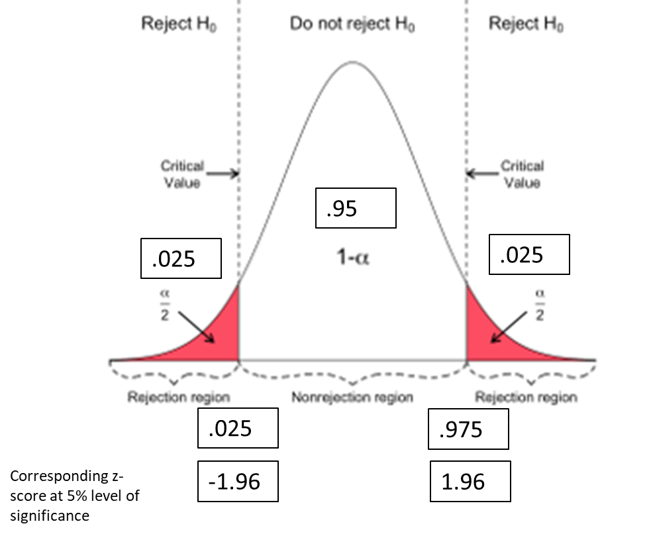

### Critical value approach

With this approach, we find the corresponding values for the upper and the lower limits(based on level of significance) and the test statistic. The area between the lower and the upper limit is the non-rejection region while the area below the lower limit and above the upper limit is the rejection region.

We now calculate the test-statistic and if the test stat lies in the rejection region, we reject the null hypothesis, otherwise we fail to reject the null hypothesis.

In [71]:
x_bar = 1.94
mu = 2
sigma = 0.1
n = 100
se = sigma/np.sqrt(n)
se

0.01

In [72]:
test_stat = (x_bar - mu)/se
test_stat

-6.000000000000005

With two tail tests, we can simply take the mod of this value and check if its smaller or larger than the upper limit value. In our case the value comes out to be 6 which is higher than the upper limit, thus it lies in the rejection region and we can reject the null hypothesis.

### p-value approach

With this approach, we calculate the p-value. P-value is the probability of getting a test statistic equal to or more extreme than the sample result, given that the null hypothesis is true. If the p-value is less than the level of significance, we can reject the null hypothesis.

In [89]:
p_val_lower_region = stats.norm.cdf(-6)
p_val_lower_region

9.865876450376946e-10

In [85]:
# this value represents the entire region below the mark
p_val_upper_region1 = stats.norm.cdf(6)

# actual p-value can be given as 1-the above value
p_val_upper_region = 1 - p_val_upper_region1
p_val_upper_region

9.865877004244794e-10

In [87]:
# thus the total p-value can be given as the sum of these two values
p_val = p_val_lower_region + p_val_upper_region
p_val

1.973175345462174e-09

So the p-value is less than our level of significance(5%), thus we can reject the null hypothesis. When we add the two p-values, the sum represents the probability of a test statistic equal to or more extreme than the sample result. 

In [92]:
# x_bar = 5.1
# mu = 4.5
# sigma = 1.2
# n = 25
# se = sigma/np.sqrt(n)
# se

0.24

In [93]:
# z_score = (x_bar - mu)/se
# z_score

2.4999999999999987

In [94]:
# p_val_lower_region = stats.norm.cdf(-z_score)
# p_val_lower_region

0.006209665325776157

In [95]:
# # this value represents the entire region below the mark
# p_val_upper_region1 = stats.norm.cdf(+z_score)

# # actual p-value can be given as 1-the above value
# p_val_upper_region = 1 - p_val_upper_region1
# p_val_upper_region

0.006209665325776159

## Example 2

**Example 2** : The mean breaking strength of the cables supplied by a manufacturer is 1800 with standard deviation of 100. By a new technique in the manufacturing process, it is claimed that the breaking strength of the cables have increased.in order to test the claim, a sample of 50 cables is tested. It is found that the mean breaking strength is 1850. Can we support the claim based on 1% level of significance? 

$H_{0}$ can be stated as $\mu$ is less than or equal to 1800        
$H_{1}$ can be stated as $\mu$ is greater than 1800


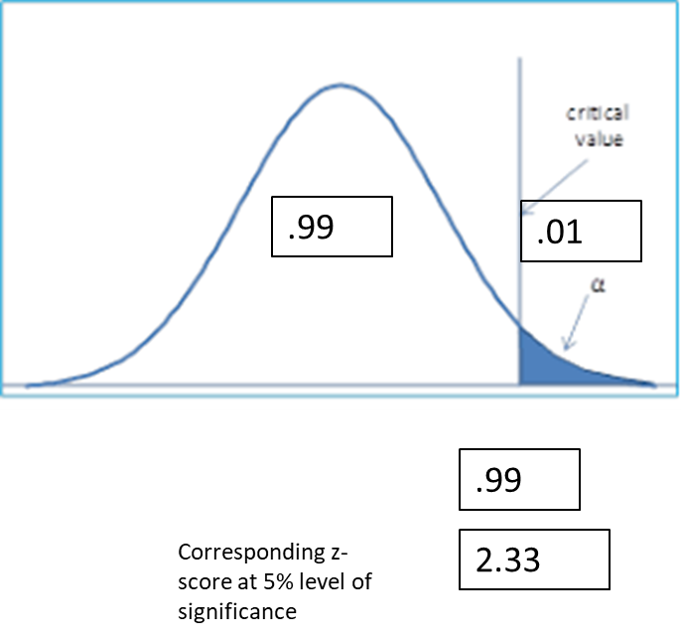

### Critical value approach

In [76]:
stats.norm.ppf(.99)

2.3263478740408408

In [77]:
x_bar = 1850
mu = 1800
sigma = 100
n = 50
se = sigma/np.sqrt(n)
se

14.14213562373095

In [78]:
z_score = (x_bar - mu)/se
z_score

3.5355339059327378

This is a right tailed test with 1% level of significance. In a right tailed test, the rejection region is the area outside the upper limit(or on the right side). If the test stat value is greater than the upper limit value(or lies in the rejection region), we can safely reject the null hypothesis. For 1% level of significance, the critical value is 2.33.

In this example, 3.53 > 2.33 and thus we can reject the null hypothesis and conclude that at 1% level of significance, the mean breaking strength of cables has increased, thus satisfying the claim. 

### p-value approach

Given that this is a right-tailed test, we will calculate the p-value corresponding to the upper region.

In [79]:
# this value represents the entire region below the 2.50 mark
p_val_upper_region1 = stats.norm.cdf(3.53)

# actual p-value can be given as 1-the above value
p_val_upper_region = 1 - p_val_upper_region1
p_val_upper_region

0.0002077798334806369

The p-value comes out to be smaller as compared to our level of significance(.01) and thus we can reject the null hypothesis.

## Example 3

The quality control department of a food-processing firm specifies that the mean net weight per package of cereal should not be less than 20 ounces. Experience has known that the weights are approximately normally distributed with standard deviation of 1.5 ounces. A random sample of 15 packets yields a mean weight of 19.5 ounces. Is this sufficient evidence to indicate that the true mean weight of the package has decreased?

$H_{0}$ can be stated as $\mu$ is greater than or equal to 20        
$H_{1}$ can be stated as $\mu$ is less than 20

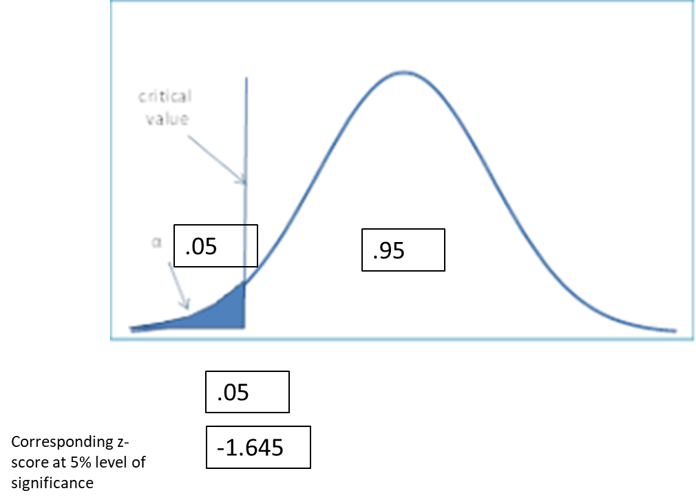

### Critical value approach

In [80]:
#Given that level of significance is not mentioned, let's assume it as 5%.

# Also, this is a left tailed test as the rejection region lies in the left tail.
stats.norm.ppf(.05)

-1.6448536269514729

In [81]:
x_bar = 19.5
mu = 20
sigma = 1.5
n = 15
se = sigma/np.sqrt(n)
se

0.3872983346207417

In [82]:
z_score = (x_bar - mu)/se
z_score

-1.2909944487358056

So the test-statistic is greater than the critical value(-1.65), thus we can say that at 5% level of significance, we fail to reject the null hypothesis or we can say that the mean weight is greater than or equal to 20.

### p-value approach

In [83]:
# this value represents the entire region below the critical value mark
p_val = stats.norm.cdf(z_score)
p_val

0.09835280122947343

Once again, the p-value is greater as compared to our level of significance(.05). Thus we fail to reject the null hypothesis. 